<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

## ガウス過程

#### 用語の整理
1. 動径基底関数
    $$
    \begin{align}
    \exp \left(- \frac{\left(x - \mu \right)^{2}}{\sigma^{2}} \right)
    \end{align}
    $$
    のような形の関数のこと。オイラーの公式で三角関数に分解できることを想像すると、名前に納得感があると思った。

1. 動径基底関数（radial basis function, RBF）回帰  
    線形回帰モデルの基底関数に、動径基底関数を用いたモデル。  
    $$
    \begin{align}
    y = \sum_{h=-H}^{H} w_{h} \exp \left(- \frac{\left(x - \mu \right)^{2}}{\sigma^{2}} \right)
    \end{align}
    $$
    データが低次元じゃないと計算できない（次元の呪い）。たとえば、1次元なら任意の曲線を表現するために$x$の値を細かくとれば良いが、2次元で任意の局面を表現するためには細かいメッシュを切る必要がある。

#### ガウス過程とは
任意次元の入力$x$に対する出力$y$の同時分布が多変量ガウス分布に従うもののこと。無限次元ガウス分布を、データのある次元だけを残して周辺化してしまったもの。正確な定義は書籍p67参照。

重み$\boldsymbol{w}$が、ガウス分布
$$
\begin{align}
\boldsymbol{w} \sim \mathcal{N} \left(\mathbf{0}, \lambda^{2} \boldsymbol{I} \right)
\end{align}
$$
から確率的に生成されると仮定して、その期待値をとって$w$を積分消去する。

ポイント
1. $w$に関数を導入したことで、線形回帰モデルの任意の点（つまり無限点）の基底関数を表現可能になった
1. $w$について全範囲$[-\infty, \infty]$を解析的に積分することで、観測された次元に限って他を積分消去（周辺化）してしまう（扱うのは有限次元で済む）
1. 周辺化によってデータ点がある次元だけで事後分布を表現できる

無限点とは何のことか、周辺化が何をしているのかのイメージをつかみたければp66の図3.5を参照のこと。ちゃんと理解したい人は再生核ヒルベルト空間について調べましょう。

ちゃんと式で考えていきます。入力$\boldsymbol{x}$に対して

$$
\begin{align}
\left(\begin{array}{c}{\widehat{y}_{1}} \\ {\widehat{y}_{2}} \\ {\vdots} \\ {\widehat{y}_{N}}\end{array}\right)&=\left(\begin{array}{cccc}{\phi_{0}\left(\boldsymbol{x}_{1}\right)} & {\phi_{1}\left(\boldsymbol{x}_{1}\right)} & {\cdots} & {\phi_{H}\left(\boldsymbol{x}_{1}\right)} \\ {\phi_{0}\left(\boldsymbol{x}_{2}\right)} & {\phi_{1}\left(\boldsymbol{x}_{2}\right)} & {\cdots} & {\phi_{H}\left(\boldsymbol{x}_{2}\right)} \\ {\vdots} & {} & {} & {\vdots} \\ {\phi_{0}\left(\boldsymbol{x}_{N}\right)} & {\phi_{1}\left(\boldsymbol{x}_{N}\right)} & {\cdots} & {\phi_{H}\left(\boldsymbol{x}_{N}\right)}\end{array}\right)\left(\begin{array}{c}{w_{0}} \\ {w_{1}} \\ {\vdots} \\ {\vdots} \\ {w_{H}}\end{array}\right) \\
\boldsymbol{\widehat y} &= \boldsymbol{\Phi w}
\end{align}
$$

とすると、
$$
\begin{align}
\mathbb{E}\left[\boldsymbol{y}\right] &= \mathbb{E}\left[\boldsymbol{\Phi w}\right] = \boldsymbol{\Phi} \mathbb{E}\left[\boldsymbol{w}\right] = \boldsymbol{0} \\
\Sigma &=\mathbb{E}\left[\boldsymbol{y y}^{\mathrm T}\right]-\mathbb{E}[\boldsymbol{y}] \mathbb{E}[\boldsymbol{y}]^{\mathrm T} \\
&= \mathbb{E}\left[(\boldsymbol{\Phi} \boldsymbol{w})(\boldsymbol{\Phi} \boldsymbol{w})^{\mathrm T}\right] \\
&= \boldsymbol{\Phi} \mathbb{E}\left[\boldsymbol{w} \boldsymbol{w}^{\mathrm T}\right] \boldsymbol{\Phi}^{\mathrm T} = \lambda^{2} \boldsymbol{\Phi} \Phi^{\mathrm T}
\end{align}
$$
より、
$$
\begin{align}
y \sim \mathcal{N} \left(\boldsymbol{0}, \lambda^{2}\boldsymbol{\Phi \Phi^{\mathrm T}} \right)
\end{align}
$$
となる。$\boldsymbol{w}$について知らなくてよい点で強力。

分散共分散行列（今回のような$A^{\mathrm T}A$の形の行列をグラム行列ともいう）$\boldsymbol{K} = \lambda^{2}\Phi\Phi^{\mathrm T}$の$n, n'$成分を見てみると、
$$
\begin{align}
\boldsymbol{K}_{n, n'} = \lambda^{2} \phi(\boldsymbol{x_{n}})^{\mathrm T}\phi(\boldsymbol{x_{n'}})
\end{align}
$$
となっており、基底関数の内積の定数倍となっている。$\boldsymbol{K}$は分散共分散行列なので、正則な対称行列であることに注意。

---

## カーネルトリック

上記の内積を、$\boldsymbol{x_{n}}$と$\boldsymbol{x_{n}}$のカーネル関数（kernel function）と呼び、以下のように定義する。 

$$
\begin{align}
k(\boldsymbol{x}_{n}, \boldsymbol{x}_{n'}) = \phi(\boldsymbol{x_{n}})^{\mathrm T}\phi(\boldsymbol{x_{n'}}) 
\end{align}
$$

$\boldsymbol{w}$は積分消去されましたが、このままだと特徴ベクトル$\phi(\boldsymbol x)$が無限次元の場合表現できません。
そこで、$\phi(\cdot)$を直接表現することを避け、内積の結果の式だけを利用します（カーネルトリック）。

では本当にこんなことで機能するのか、p69の例で実際に確認してみます。カーネル関数を
$$
\begin{align}
k(\boldsymbol{x}, \boldsymbol{x'}) = \theta_{1} \exp \left( -\frac{|\boldsymbol{x}-\boldsymbol{x'}|^{2}}{\theta_{2}} \right)
\end{align}
$$
として、データ点の刻み方を変化させて関数を生成してみます。

In [1]:
using LinearAlgebra
using Printf
using PyCall
np = pyimport("numpy")

function kernel_rbf(x1, x2, params)
    v = x1-x2
    θ1, θ2 = params
    dist = dot(v,v)
    θ1 * exp(-abs(dist)^2 / θ2)
end

function kernel_linear(x1, x2, param)
    dot(x1,x2) + param
end

function kernel_exponential(x1, x2, param)
    exp(-sum(abs(x1-x2))/param)
end

function kernel_periodic(x1, x2, params)
    p1, p2 = params
    exp(p1 * cos(sum(abs(x1-x2))/p2))
end

function kernel_matrix(xx::AbstractMatrix{T}, kernel::Function) where {T}
    N = size(xx)[2]
    K = reshape([kernel(xx[:,i], xx[:,j]) for i in 1:N for j in 1:N], (N,N))'
    collect(K)
end

function kernel_matrix(xx::AbstractVector{T}, kernel::Function) where {T}
    N = length(xx)
    K = reshape([kernel(xx[i], xx[j]) for i in 1:N for j in 1:N], (N,N))'
    collect(K)
end
        
# function mvnorm(μ::AbstractVector{T}, K::AbstractMatrix{T}, n::Integer) where {T<:Real}
# # 発散する
#     L = LowerTriangular(K)
#     y = zeros(Float64, (size(L)[1], n))
#     for i=1:n
#         x = randn(size(L)[1])
#         y[:,i] = μ .+ L*x
#     end
#     return y
# end

function gp(xx::AbstractVector{T}, kernel::Function; n=1) where {T}
    K = kernel_matrix(xx, kernel)
    K = collect(Hermitian(K))
    np.random.multivariate_normal(zero(xx), K)
    # mvnorm(zero(xx), K, n) # 発散していく
end

# function gp(xx::AbstractMatrix{T}, kernel::Function; n=1) where {T}
#     K = kernel_matrix(xx, kernel)
#     K = collect(Hermitian(K))
#     np.random.multivariate_normal(zeros(size(xx)[2]), K)
#     # mvnorm(zero(xx), K, n) # 発散していく
# end


gp (generic function with 1 method)

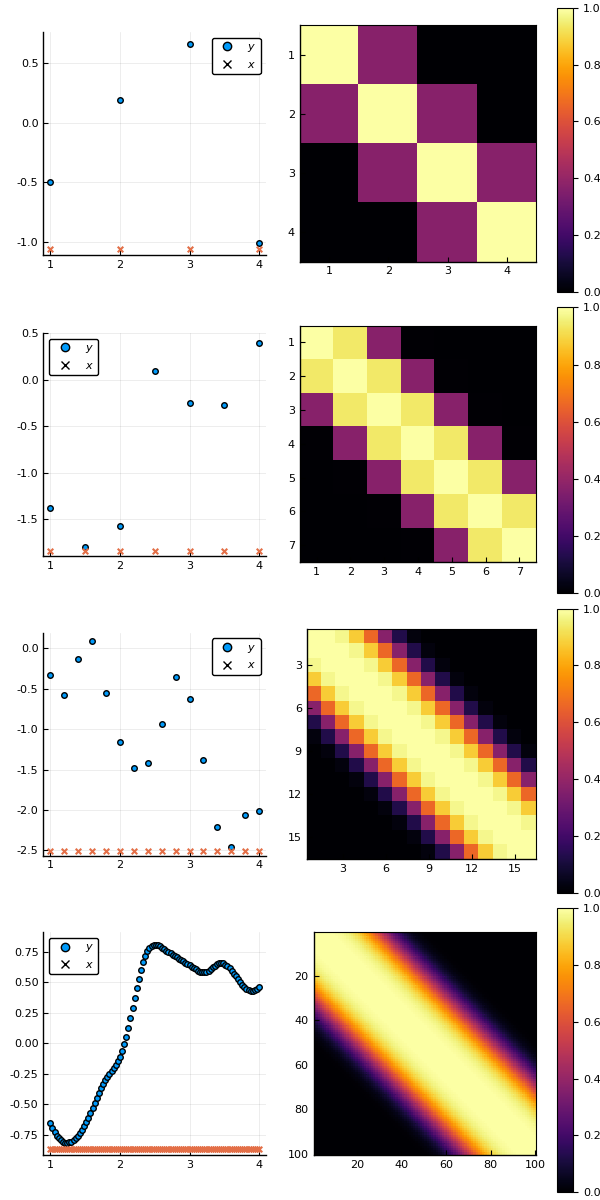

In [16]:
using Plots
pyplot()
using Plots.PlotMeasures
using LaTeXStrings

θ₁=1
θ₂=1
kernel(x₁, x₂) = kernel_rbf(x₁, x₂, [θ₁, θ₂])

num_samples=[4,7,16,100]
P = []
for i=num_samples
    x = collect(range(1,stop=4,length=i))
    K = collect(Hermitian(kernel_matrix(x, kernel)))
    y = gp(x, kernel)


    xlim = (minimum(x)-0.1, maximum(x)+0.1)
    ylim = (minimum(y)-0.1, maximum(y)+0.1)
    diff_x = xlim[2]-xlim[1]
    diff_y = ylim[2]-ylim[1]
    aspect_ratio = diff_x/diff_y
    plot(x, y, st=:scatter, label=L"$y$")
    p1 = plot!(x, zero(x).+minimum(y).-0.05, marker=:x, st=:scatter, aspect_ratio=aspect_ratio,
        xlim=xlim, ylim=ylim, legend=:best, label=L"$x$")
    p2 = heatmap(K, aspect_ratio=1, yflip=true, grid=false, border=nothing,
        xlim=(0.5, size(K)[2]+0.5), ylim=(0.5, size(K)[1]+0.5))
    push!(P, p1, p2)
end
plot(P..., size=(600,300*length(num_samples)), margin=3mm, layout=(length(num_samples),2))

だんだんと滑らかな曲線が現れるのがわかる。  
2次元なら曲面が得られるということを確認しておく。

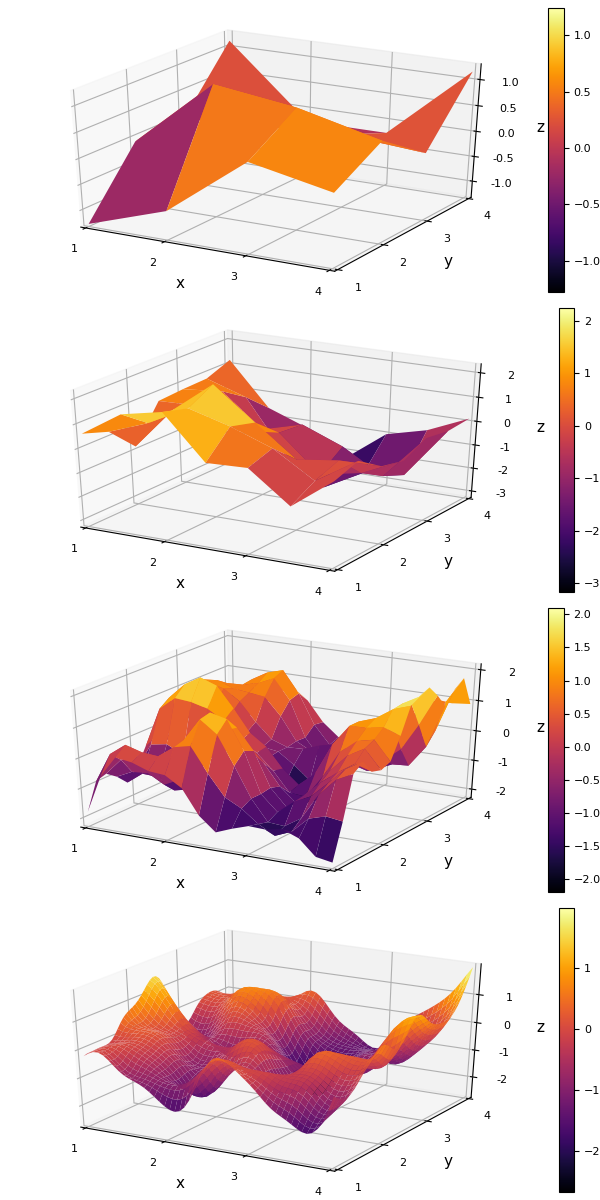

In [28]:
params = [1.,1.]
kernel(x₁, x₂) = kernel_rbf(x₁, x₂, params)

num_samples=[4,7,16,50]
P = []
for i=num_samples
    x = range(1,stop=4,length=i)
    y = range(1,stop=4,length=i)
    N = length(x)
    xx = hcat([[i,j] for i in x for j in y]...)
    
    z = reshape(gp(xx, kernel), (length(y)), length(x))

    xlim = (minimum(x)-0.1, maximum(x)+0.1)
    ylim = (minimum(x)-0.1, maximum(x)+0.1)
    diff_x = xlim[2]-xlim[1]
    diff_y = ylim[2]-ylim[1]
    aspect_ratio = diff_x/diff_y
    p1 = plot(x, y, z, st=:surface, label=L"$y$", xlabel=:x, ylabel=:y, zlabel=:z)
    push!(P, p1)
end
plot(P..., size=(600,300*length(num_samples)), margin=3mm, layout=(length(num_samples),1))

どの曲面も、対応する再生核ヒルベルト空間
$$
\begin{align}
\boldsymbol{f} \sim \mathcal{N} \left(\mathbf{0}, \boldsymbol{K}\right)
\end{align}
$$
から1点サンプリングしただけであることに注意。
---

## ガウス過程とカーネル
#### RBFカーネルと基底関数
RBFカーネルを用いたガウス過程による超曲面が、無限個の基底関数で重みづけた線形モデルとなることを確認する。

x軸上の$-H<x<H$の範囲に、$1/H$おきに点$h/H (h=-H^2,\ldots,H^2)$を中心とする基底関数
$$
\begin{align}
\phi_{h} (x) = \tau \exp \left(- \frac{(x-h)/H^2}{r^2} \right)
\end{align}
$$
を考えると、特徴ベクトルは
$$
\begin{align}
\phi (x) = \left(\phi_{-H^2}(x),\ldots,\phi_{H^2}(x) \right)
\end{align}
$$
となる。この時のカーネル関数
$$
\begin{align}
k(x, x^{\prime}) = \sum_{h=-H^2}^{H^2} \phi_{h}(x)\phi_{h}(x^{\prime})
\end{align}
$$
において、$H \rightarrow \infty$としてグリッドの無限小を考える。

$$
\begin{align}
k\left(x, x^{\prime}\right) &= \lim _{H \rightarrow \infty} \sum_{h=-H^{2}}^{H^{2}} \phi_{h}(x) \phi_{h}\left(x^{\prime}\right) \\
&\rightarrow \int_{-\infty}^{\infty} \tau^{2} \exp \left(-\frac{(x-h)^{2}}{r^{2}}\right) \exp \left(-\frac{\left(x^{\prime}-h\right)^{2}}{r^{2}}\right) \mathrm{d} h \\
&=\tau^{2} \int_{-\infty}^{\infty} \exp \left(-\frac{1}{r^{2}}\left\{(x-h)^{2}+\left(x^{\prime}-h\right)^{2}\right\}\right) \mathrm{d} h
\end{align}
$$

ここで、
$$
\begin{align}
(x-h)^2 + \left(x^{\prime}-h\right)^2 &= x^2 -2xh + h^2 +x'^{2} - 2hx^{\prime} + h^2 \\
&= 2h^2 -2\left(x + x^{\prime}\right) h + x^2 + x'^{2} \\
&= 2\left(h-\frac{x+x^{\prime}}{2} \right)^2 - \frac{\left(x+x'\right)^2}{2} + x^2 + x'^{2} \\
&= 2\left(h-\frac{x+x^{\prime}}{2} \right)^2 + \frac{\left(x - x'\right)^2}{2}
\end{align}
$$
より

$$
\begin{align}
\tau^{2} \int_{-\infty}^{\infty} \exp \left(-\frac{1}{r^{2}}\left\{(x-h)^{2}+\left(x^{\prime}-h\right)^{2}\right\}\right) \mathrm{d} h &=\tau^{2} \int_{-\infty}^{\infty} \exp \left[-\frac{1}{r^{2}}\left\{2\left(h-\frac{x+x^{\prime}}{2}\right)^{2}+\frac{1}{2}\left(x-x^{\prime}\right)^{2}\right\}\right] \mathrm{d} h \\
&=\tau^{2} \int_{-\infty}^{\infty} \exp \left\{-\frac{2}{r^{2}}\left(h-\frac{x+x^{\prime}}{2}\right)^{2}\right\} \mathrm{d} h \cdot \exp \left\{-\frac{1}{2 r^{2}}\left(x-x^{\prime}\right)^{2}\right\} \\
\end{align}
$$
ここで、
$$
\begin{align}
\int_{-\infty}^{\infty} \exp \left\{-\frac{2}{r^{2}}\left(h-\frac{x+x^{\prime}}{2}\right)^{2}\right\} \mathrm{d} h
\end{align}
$$
をよく眺めてみると、正規分布の正規化定数を求める式と同じ形をしていることがわかるので、正規分布の確率密度関数
$$
\begin{align}
f(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
\end{align}
$$
と見比べれば、

$$
\begin{align}
2\sigma^2 &= \frac{r^2}{2} \\
\sigma^2 &= \frac{r^2}{4}
\end{align}
$$
より、分散が$\frac{r^2}{4}$の正規分布の正規化定数に一致することがわかる。以上より、

$$
\begin{align}
\tau^{2} \int_{-\infty}^{\infty} \exp \left\{-\frac{2}{r^{2}}\left(h-\frac{x+x^{\prime}}{2}\right)^{2}\right\} \mathrm{d} h \cdot \exp \left\{-\frac{1}{2 r^{2}}\left(x-x^{\prime}\right)^{2}\right\} &=\tau^{2} \sqrt{2\pi r^{2} / 4} \exp \left(-\frac{1}{2 r^{2}}\left(x-x^{\prime}\right)^{2}\right) \\
&= \tau^{2} \sqrt{\pi r^{2} / 2} \exp \left(-\frac{1}{2 r^{2}}\left(x-x^{\prime}\right)^{2}\right) \\
&\equiv \theta_{1} \exp \left(-\frac{1}{\theta_{2}}\left(x-x^{\prime}\right)^{2}\right) \quad\left(\theta_{1}=\tau^{2} \sqrt{\pi r^{2} / 2}, \theta_{2}=2 r^{2}\right)
\end{align}
$$
となる。グリッドを無限個に刻む$\rightarrow$基底関数を無限個（無限次元の特徴ベクトル）用意した線形回帰モデルとなっていることがわかる。特徴ベクトルが無限次元ということは、重み係数$\boldsymbol{w}$も無限個必要になるが、$\boldsymbol{w}$は積分消去されているため問題にならない。式を見たらわかる通り、最終的に残るのはデータのある点だけである。これが[カーネルトリック](#カーネルトリック)の正体である。

#### カーネルと関数形
ガウス過程の事後期待値はその関数が使ったカーネル関数の重み付き和になる（リプレゼンター定理）。詳細は書籍p73を参照。
#### さまざまなカーネル
カーネルには何種類かあるようなので、試してみる（上でまとめて実装済み）。

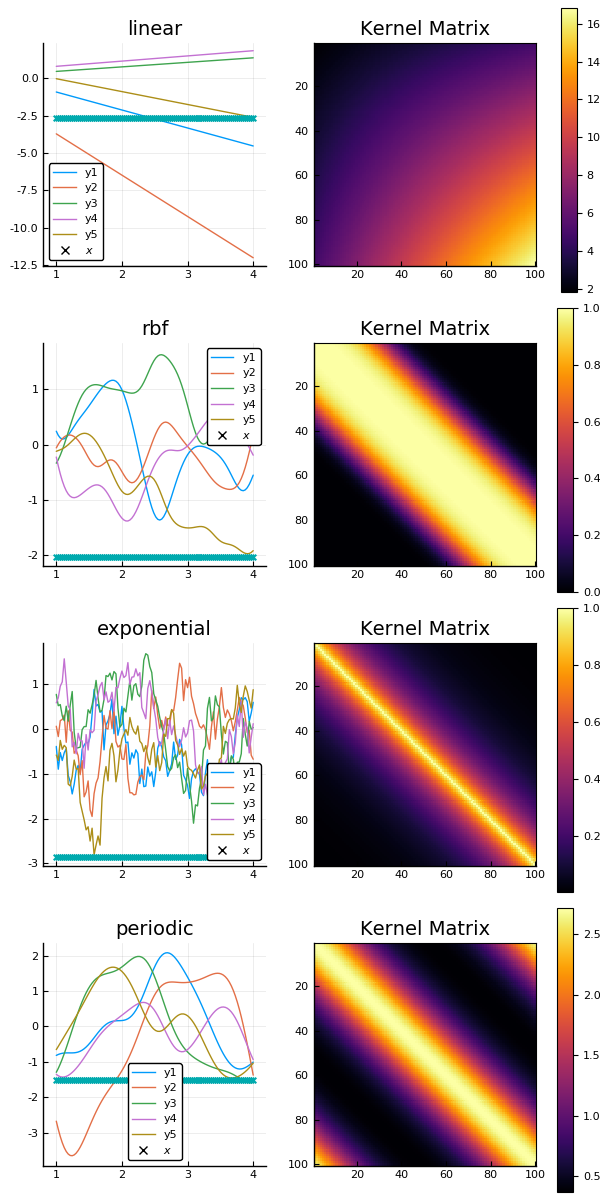

In [24]:
using Plots
pyplot()
using Plots.PlotMeasures
using LaTeXStrings


param = randn()
kernel_linear(x₁, x₂) = kernel_linear(x₁, x₂, param)
kernel_rbf(x₁, x₂) = kernel_rbf(x₁, x₂, [1., 1.])
kernel_exponential(x₁, x₂) = kernel_exponential(x₁, x₂, 0.5)
kernel_periodic(x₁, x₂) = kernel_periodic(x₁, x₂, [1., 0.5])
kernels = [kernel_linear, kernel_rbf, kernel_exponential, kernel_periodic] 
titles = ["linear", "rbf", "exponential", "periodic"]

num_sample=100
num_resample=5
P = []
for (i,kernel) in enumerate(kernels)
    x = collect(range(1,stop=4,length=num_sample))
    K = kernel_matrix(x, kernel)
    
    y = gp(x, kernel)

    xlim = [minimum(x)-0.1, maximum(x)+0.1]
    ylim = [minimum(y) , maximum(y)]
    p1 = plot(x, y, label=@sprintf("y%d", 1))
    
    for j=2:num_resample
        y = gp(x, kernel)
        if minimum(y) < ylim[1]
            ylim[1] = minimum(y)
        end
        if maximum(y) > ylim[2]
            ylim[2] = maximum(y)
        end
        plot!(p1, x, y, label=@sprintf("y%d", j))
    end
    ylim[1] -= 0.1
    ylim[2] += 0.1
    
    diff_x = xlim[2]-xlim[1]
    diff_y = ylim[2]-ylim[1]
    aspect_ratio = diff_x/diff_y
        
    p1 = scatter!(x, zero(x).+minimum(y).-0.05, marker=:x, aspect_ratio=aspect_ratio,
        xlim=xlim, ylim=ylim, legend=:best, label=L"$x$", title=titles[i])
    p2 = heatmap(K, aspect_ratio=1, yflip=true, grid=false, border=nothing,
        xlim=(0.5, size(K)[2]+0.5), ylim=(0.5, size(K)[1]+0.5), title="Kernel Matrix")
    push!(P, p1, p2)
end
plot(P..., size=(600,300*length(kernels)), margin=3mm, layout=(length(kernels),2))

自分で正規分布からサンプリングするのはやめましょう（自戒）。  
かといって、Juliaだと多変量正規分布からサンプリングするのがうまくいかない...  
今回はnumpyを呼び出して使った。


#### linear kernel
線形回帰モデルを内包
#### exponential kernel
ブラウン運動と関連する（Ornstein-Uhlenbeck Process）
#### periodic kernel
極座標における単位円での2点間のユークリッド距離を、rbfカーネルの距離の項と差し替えると現れる。
$$
\begin{align}
\left|(\cos x, \sin x)-\left(\cos x', \sin x' \right)\right|^{2} &=\left|\left(\cos x-\cos x', \sin x-\sin x'\right)\right|^{2} \\ 
&=2-2\left(\cos x \cos x'+\sin x \sin x' \right) \\
&=2-2 \cos \left(x-x' \right)
\end{align}
$$
これをrbfカーネルのL2ノルムの項と差し替えて
$$
\begin{align}
k\left(x, x^{\prime}\right) &=\exp \left(-\frac{2-2 \cos \left(x-x^{\prime}\right)}{\sigma^{2}}\right) \\ & \propto \exp \left(\theta_{1} \cos \left(x-x^{\prime}\right)\right) \quad\left(\theta_{1}=2 / \sigma^{2}\right)
\end{align}
$$
三角関数の周期もパラメータ$\theta_2$とすれば
$$
\begin{align}
k\left(x, x^{\prime}\right) &= \exp \left(\theta_{1} \frac{\cos \left(x-x^{\prime}\right)}{\theta_2}\right)
\end{align}
$$
となる。偏角が近いかどうかを表している。

#### カーネルの組み合わせ


#### Matérn kernel

## 文献
1. [Kanagawa, Motonobu, et al. "Gaussian processes and kernel methods: A review on connections and equivalences." arXiv preprint arXiv:1807.02582 (2018).](https://arxiv.org/abs/1807.02582)  
    ベイズ統計の立場からみたカーネル法